In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


📊 Distribuição dos valores de cada feature:
              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.0

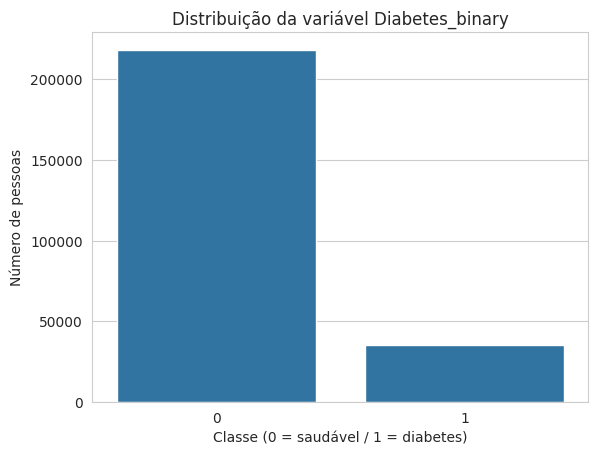


🔎 Variância das features:
CholCheck                0.035937
Stroke                   0.038925
AnyHealthcare            0.046552
HvyAlcoholConsump        0.053039
NoDocbcCost              0.077091
HeartDiseaseorAttack     0.085315
DiffWalk                 0.139925
Veggies                  0.153018
PhysActivity             0.184186
Fruits                   0.231976
HighChol                 0.244243
HighBP                   0.244960
Sex                      0.246442
Smoker                   0.246771
Education                0.971751
GenHlth                  1.141644
Income                   4.289652
Age                      9.328262
BMI                     43.674839
MentHlth                54.950296
PhysHlth                76.002675
dtype: float64

⚖️ Proporção das classes em y (Diabetes_binary):
Diabetes_binary
0    0.860667
1    0.139333
Name: proportion, dtype: float64

🧩 Features com baixa variância (< 0.01):
Series([], dtype: float64)


In [15]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
#print(cdc_diabetes_health_indicators.metadata)

# variable information
#print(cdc_diabetes_health_indicators.variables)


y = y["Diabetes_binary"]

# X = X.head(1000)
# y = y.head(1000)
# print(X.head(10))

def diagnostico_dataset(X, y):
    print("📊 Distribuição dos valores de cada feature:")
    print(X.describe())
    sns.countplot(x=y)
    plt.title("Distribuição da variável Diabetes_binary")
    plt.xlabel("Classe (0 = saudável / 1 = diabetes)")
    plt.ylabel("Número de pessoas")
    plt.show()

    print("\n🔎 Variância das features:")
    print(X.var().sort_values())

    print("\n⚖️ Proporção das classes em y (Diabetes_binary):")
    print(y.value_counts(normalize=True))

    print("\n🧩 Features com baixa variância (< 0.01):")
    baixa_var = X.var()[X.var() < 0.01]
    print(baixa_var)

diagnostico_dataset(X, y)



# Split data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (classification)
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# print("k-NN Accuracy:", knn.score(X_test, y_test))

# Linear Regression (regression task – only if you use a continuous target!)
# linreg = LinearRegression()
# linreg.fit(X_train, y_train)
# y_pred = linreg.predict(X_test)
#
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# print("Linear Regression RMSE:", rmse)



# Questão 1 Estruturação conceitual do problema de modelagem



#### B.Justifique tecnicamente por que o problema em questão deve ser tratado como uma tarefa de classificação supervisionada, considerando a presença da variável-alvo (Diabetes_binary) e a natureza das variáveis explicativas disponíveis na base de dados.

Como o problema envolve um dataset em que **já conhecemos** as features( colesterol alto, fumante, consumo de vegetais,etc) a modelagem envolverá descobrir Y, onde Y é a variável-alvo que desejamos saber, ou seja, não se trata de conhecer as features do dataset, então por isso será uma tarefa de classificação **supervisionada**.


#### C.Identifique e discuta ao menos dois desafios relevantes para a aplicação de modelos de aprendizado supervisionado neste conjunto de dados, como por exemplo: necessidade de normalização, variáveis com baixa variância, ou possível desequilíbrio entre classes.


1. Features que não contribuem:

    Atráves do método `X.describe` do pandas é possível identificar que a resposta das pessoas em sua vasta maioria teve média de quase 1 para checagem de Colesterol nos ultimos 5 anos e se possuem plano de saúde, ou seja, a quase todo mundo respondeu Sim para ambos, sendo uma falta de diversidade que não contribui para o modelo aprender a identificar quem terá diabetes

1.  Desequilibrio entre classes na variável-alvo:

    No dataset de  CDC Behavioral Risk Factor Surveillance a variável alvo  que diz se uma pessoa tem ou não diabetes em sua maior parte ( 86%) são de pessoas que não tem diabetes, um modelo treinado por esse dataset iria adivinhar que uma pessoa não terá diabetes em grande parte do tempo, mas não será **eficaz para prever pessoas que terão diabetes, ou seja a minoria**. Para resolver isso poderiámos utilizar Downsampling reduzindo aleatoriamente o número de exemplos da classe majoritária.

In [ ]:
a